## Moises Quiroz Diaz

## Desafío - Clasificación desde Machine Learning



* Para poder realziar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : Total de saldo en la cuenta de crédito.
* student : Variable binaria. Registra si el cliente es estudiante o no

### Desafío 1: Preparación del ambiente de trabajo

* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler , classification_report y roc_curve de sklearn
* Importe el archivo default_credit.csv

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
df = pd.read_csv('default_credit.csv',index_col='index')
df.head()

,default,student,balance,income
index,,,,
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    * Un boxplot del balance total de las cuentas, segmentado por el status de default.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.
* tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.

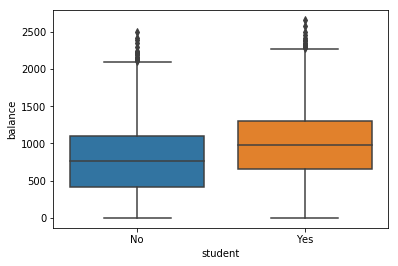

In [3]:
sns.boxplot(df.student,df.balance)

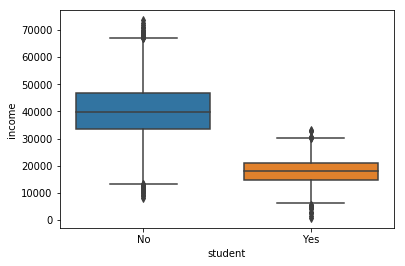

In [4]:
sns.boxplot(df.student,df.income)

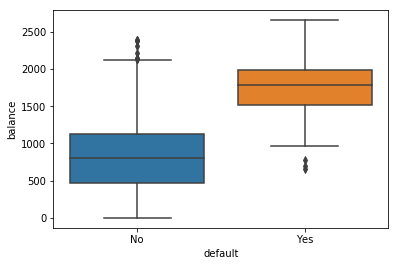

In [5]:
sns.boxplot(df.default,df.balance)

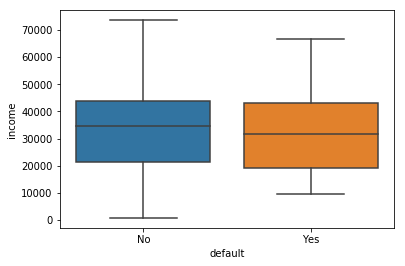

In [6]:
sns.boxplot(df.default,df.income)

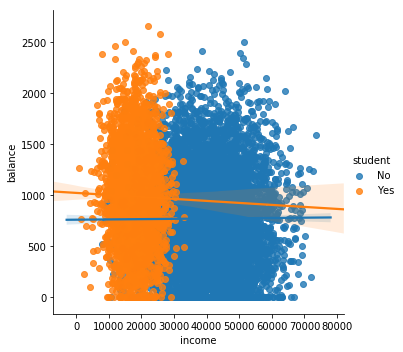

In [7]:
sns.lmplot(x='income',y='balance',hue='student',data=df)

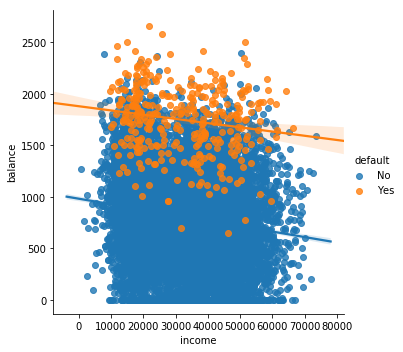

In [8]:
sns.lmplot(x='income',y='balance',hue='default',data=df)

* Se observa que ser estudiante tiene un mayor balance y que a su vez presentan menos probabilidad de tener deuda

### Desafío 3: Modelación econométrica
Recodifique las variables student y default para que adquieran atributos numéricos.
Implemente el siguiente modelo econométrico:


$$\log\left(\frac{p({default=1})}{1 - p({default=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {balance} +{\beta }_{2} \cdot {income}+{\beta }_{3} \cdot {student} }$$


A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [9]:
tmp = pd.get_dummies(df,columns=['student','default'])
tmp = tmp.drop('student_No', axis =1)
tmp = tmp.drop('default_No', axis =1)
tmp.head()

,balance,income,student_Yes,default_Yes
index,,,,
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,1,0
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


In [10]:
modelo = smf.logit('default_Yes ~balance +income + student_Yes',tmp).fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        11:42:50   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057      0.000     24.737      0.000       0.005       0.006
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_Yes    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
modelo2 = smf.logit('default_Yes ~balance + student_Yes',tmp).fit()
modelo2.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        11:42:51   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance         0.0057      0.000     24.748      0.000       0.005       0.006
student_Yes    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Se observa que si eres estudiante, es una variable que afecta inversamente a si tienes deuda o no y que balance tiene poco impacto en el modelo

### Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
* Estandarize la matriz de atributos.
* Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
*  Implemente el modelo sin alterar los hiperparámetros.
*  Genere la predicción de las clases y de la probabilidad.
*  Reporte las métricas de precision, recall y f1 para ambas clases.
*  Grafique la curva Receiver Operator Characteristic.

En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [12]:
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(tmp.loc[:,['balance','student_Yes']]),tmp['default_Yes'],test_size=.33,random_state=123)




In [13]:
modelo = LogisticRegression().fit(x_train,y_train)

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
yhat =modelo.predict(x_test)
yhat[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [15]:
yhat_prob =modelo.predict_proba(x_test)[:,1]

In [16]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       0.73      0.25      0.38       106

    accuracy                           0.97      3300
   macro avg       0.85      0.63      0.68      3300
weighted avg       0.97      0.97      0.97      3300



In [17]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       0.73      0.25      0.38       106

    accuracy                           0.97      3300
   macro avg       0.85      0.63      0.68      3300
weighted avg       0.97      0.97      0.97      3300



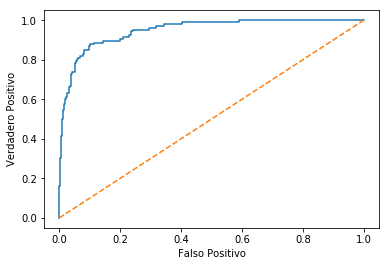

In [18]:
false_positive, true_positive, thres = roc_curve(y_test,yhat_prob)
plt.plot(false_positive,true_positive)
plt.ylabel('Verdadero Positivo')
plt.xlabel('Falso Positivo')
plt.plot([0,1],ls='--')
#Entre mas pegado a la esquina es mejor para acertar los positivos, osea es bueno para decir que son 0

* Se observa que el modelo es bueno para acertar los 0's

In [19]:
roc_auc_score(y_test,yhat_prob)

0.9488250375113715

In [20]:
print(confusion_matrix(y_test,yhat))

[[3184   10]
 [  79   27]]


El desempeño del modelo es aceptable ya que la data que usaba en su mayoria era de 0's por lo que se espera que en la mayoria de los casos etiquete a un valor como 0, acerto solo a 27 de los 106 '1's lo que es concordante con el tipo de data que utiliza